# BIKE SHARING DEMAND PROBLEM

![title](Images/bikerental.png)

# 1.Business Problem

## 1.1 Problem Context
Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and returning back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.



## 1.2 Problem Statement

To forecast bike rental demand of Bike sharing program in Washington, D.C based on historical usage patterns in relation with weather, time and other data.

Using these Bike Sharing systems, people rent a bike from one location and return it to a different or same place on need basis. People can rent a bike through membership (mostly regular users) or on demand basis (mostly casual users). This process is controlled by a network of automated kiosk across the city.



## 1.3 Business Objectives and Constraints
* Deliverable: Trained model file
* Model interprtability is very important
* No latency constraints

# 2. Machine Learning Problem

 

## 2.1 Data Overview

There are 10886 observations across 12 attributes.

* datetime:   date and hour in "mm/dd/yyyy hh:mm" format

* season:     Four categories->
              1. spring 
              2. summer
              3. fall
              4. winter


* holiday:    whether the day is a holiday or not (1/0)

* workingday: whether the day is neither a weekend nor holiday (1/0)

* weather:    Four Categories of weather->
            
            1. Clear, Few clouds, Partly cloudy, Partly cloudy
            2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
            3. Light Snow and Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
            4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


* temp:       hourly temperature in Celsius

* atemp:      apparent or "feels like" temperature in Celsius

* humidity:   relative humidity

* windspeed:  wind speed

* registered: number of registered user

* casual:     number of non-registered user

**TARGET VARIABLE**

* count:      number of total rentals (registered + casual)  
 

## 2.2 Mapping business problem to ML problem
### 2.2.1 Type of Machine Learning Problem
It is a regression problem, where given the above set of features, we need to predict count.

### 2.2.2 Performance Metric (KPI)
**Since it is a regression problem, we will use the following regression metrics:**
#### 2.2.2.1 Root Mean Squared Error (RMSE)

The Root Mean Square Error (RMSE) (also called the root mean square deviation, RMSD) is a frequently used measure of the difference between values predicted by a model and the values actually observed from the environment that is being modelled

![title](Images/rmse.png)

Aim is to get the model with minimum value of RMSE

#### 2.2.2.2 R-squared


R-squared is a statistical measure of how close the data are to the fitted regression line.

![title](Images/rsquared.png)

#### 2.2.2.3 Mean Absolute Error (MAE):

The mean absolute error (MAE) is a quantity used to measure how close forecasts or predictions are to the eventual outcomes.

![title](Images/mae.png)

## 2.3 Train-Test Splits
**80-20**

# 3. Exploratory Data Analysis

### 3.1 Import the libraries

In [78]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline
# import color maps
from matplotlib.colors import ListedColormap

# Seaborn for easier visualization
import seaborn as sns

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

from math import sqrt

# Function for splitting training and test set
from sklearn.model_selection import train_test_split

# Function to perform data standardization 
from sklearn.preprocessing import StandardScaler

# Libraries to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Import classes for ML Models
from sklearn.linear_model import Ridge  ## Linear Regression + L2 regularization
from sklearn.linear_model import Lasso  ## Linear Regression + L1 regularization

from sklearn.svm import SVR ## Support Vector Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


# Evaluation Metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
## import xgboost
import os
os.environ['PATH'] = os.environ['PATH'] + ';C:\\Program Files\\mingw-w64\\x86_64-5.3.0-posix-seh-rt_v4-rev0\\mingw64\\bin'

from xgboost import XGBRegressor
from xgboost import plot_importance  ## to plot feature importance

# To save the final model on disk
from sklearn.externals import joblib  ## Reference http://scikit-learn.org/stable/modules/model_persistence.html

from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score

In [79]:
np.set_printoptions(precision=2, suppress=True)

### 3.2 Loading dataset

In [80]:
df = pd.read_csv('Files/train.csv')

In [4]:
df.shape

(10886, 12)

In [5]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [6]:
pd.set_option('display.max_columns', 100) ## display max 100 columns
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


filtering categorical features

In [7]:
df.dtypes[df.dtypes=='object']

datetime    object
dtype: object

## 3.3 Distribution of numeric features

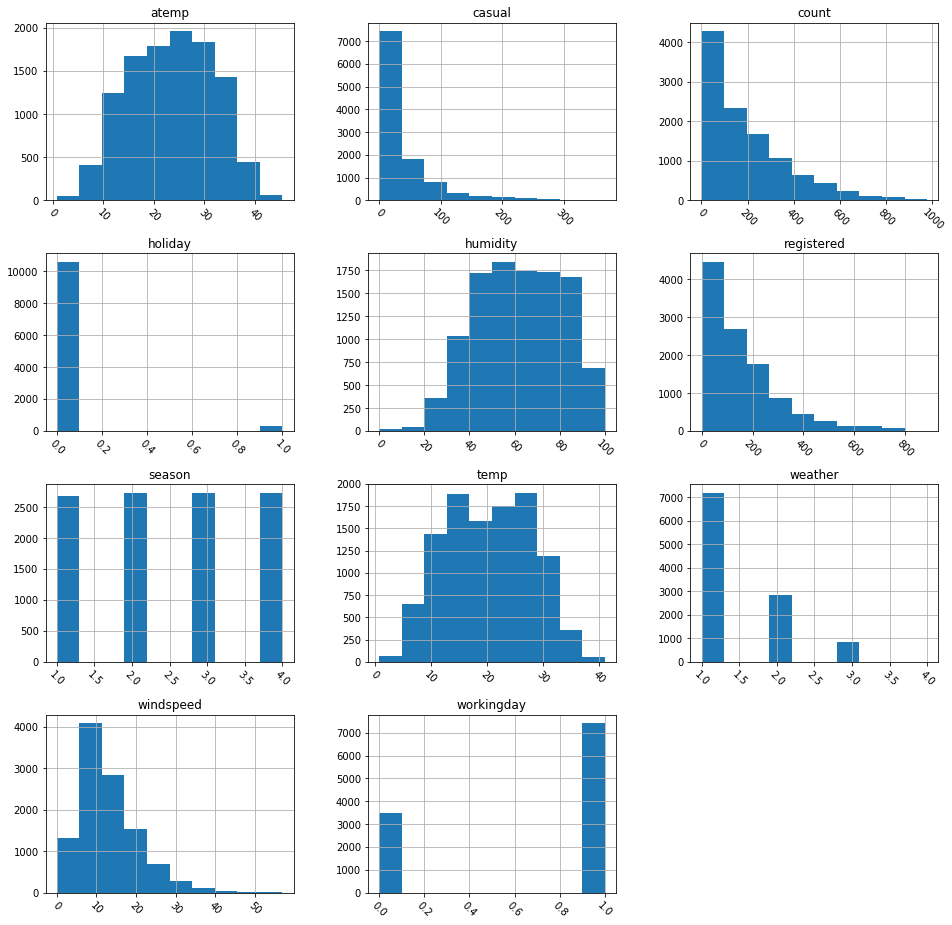

In [8]:
# Plot histogram grid
df.hist(figsize=(16,16), xrot=-45) ## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()

observation: During working days the demand is more.

In [9]:
#Displaying summary statistics
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


### 3.4 Distribution of categorical features

In [81]:
df.describe(include=['object'])

,datetime
count,10886
unique,10886
top,2012-10-06 08:00:00
freq,1


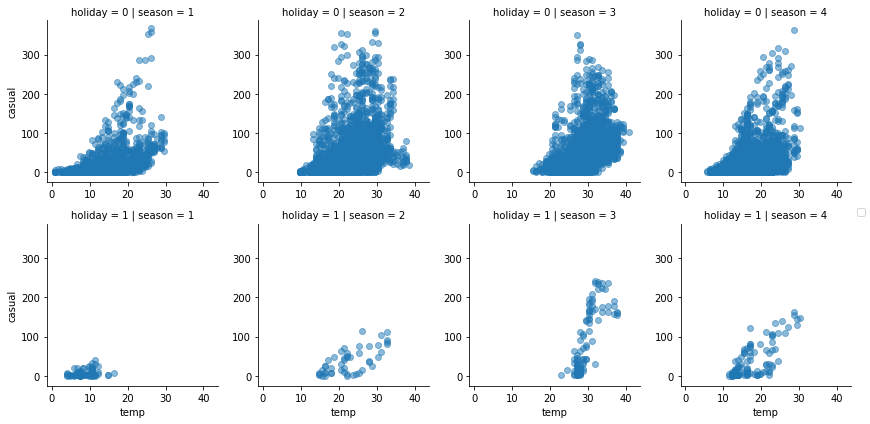

In [11]:
grid = sns.FacetGrid(df, col = 'season', row = 'holiday')
grid.map(plt.scatter, 'temp', 'casual', alpha = 0.5)
grid.add_legend();

More cycling and hence greater demand during Fall holidays

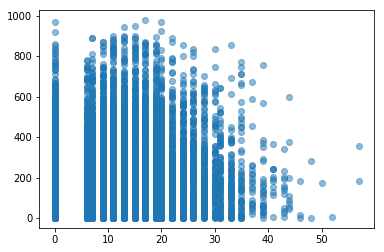

In [12]:
plt.scatter(x = df['windspeed'], y = df['count'], alpha= .5)
plt.show()

As the wind speed increases, it becomes difficult to cycle.Hence,the demand is low at that time.

In [13]:
df[['count', 'holiday']].groupby(['holiday'], as_index = False).mean().sort_values(by = 'count')


,holiday,count
1,1,185.877814
0,0,191.741655


During working days the demand is more.

In [14]:
df[['count', 'workingday']].groupby(['workingday'], as_index = False).mean().sort_values(by = 'count')


,workingday,count
0,0,188.506621
1,1,193.011873


## 3.5 Correlations
* Finally, let's take a look at the relationships between numeric features and other numeric features.
* ***Correlation*** is a value between -1 and 1 that represents how closely values for two separate features move in unison.
* Positive correlation means that as one feature increases, the other increases; 
* Negative correlation means that as one feature increases, the other decreases; 
* Correlations near -1 or 1 indicate a strong relationship.
* Those closer to 0 indicate a weak relationship.
* 0 indicates no relationship.

In [15]:
df.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


* Correlation between count and registered is 0.970948(positive correleation approaching 1). This implies that registered users have more demand for the bike than casual users.
* Demand increases with decrease in humidity

#### Plotting heat map for visualization

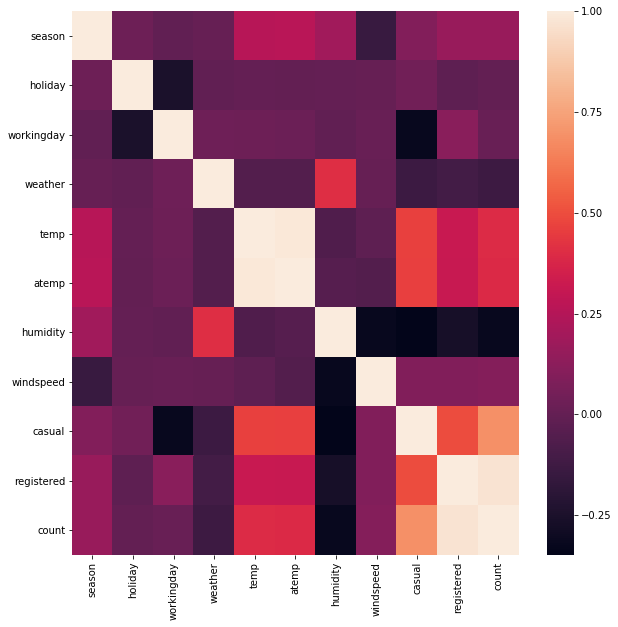

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

* Strong positive correlation between registered and count, shown by light colour
* Strong negative correlation between humidity and count, shown by dark colour

##### Making fancier visualization

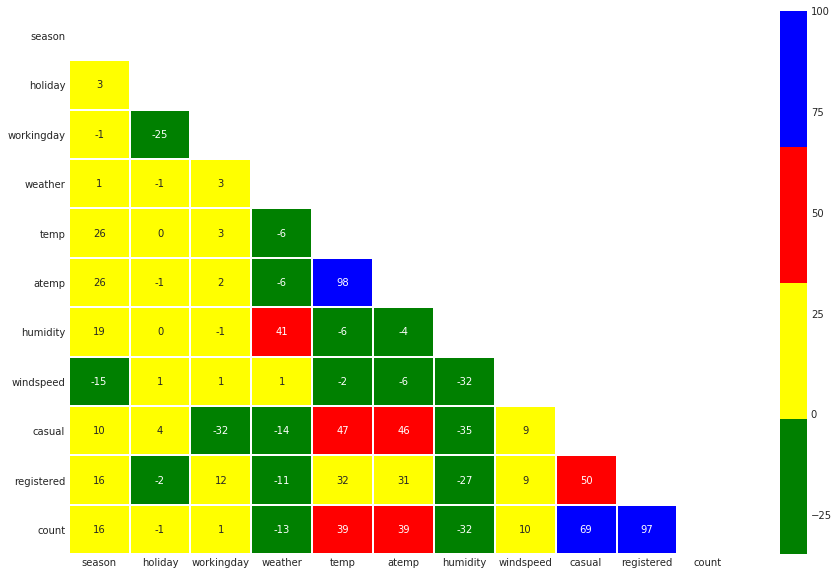

In [17]:
mask=np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15,10))
with sns.axes_style("white"):
    ax = sns.heatmap(df.corr()*100, mask=mask, fmt='.0f', annot=True, lw=1, cmap=ListedColormap(['green', 'yellow', 'red','blue']))

# 4. Data Cleaning
## 4.1 Dropping the duplicates (De-duplication)
Duplicate observations most frequently arise during data collection, such as when we:
* Combine datasets from multiple places
* Scrape data
* Receive data from clients/other departments

In [87]:
df = df.drop_duplicates()
print( df.shape )

(10886, 12)


There is no change in the dimensions. Hence no duplicates.

## 4.2 Checking for outliers

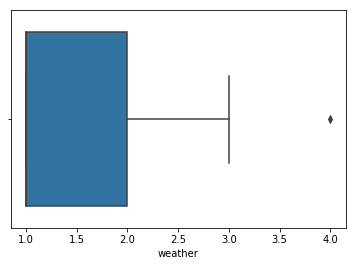

In [19]:
sns.boxplot(df.weather)

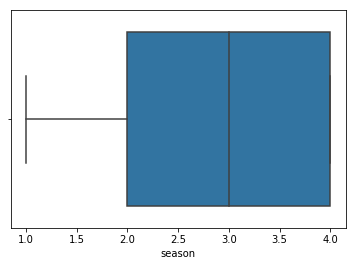

In [20]:
sns.boxplot(df.season)

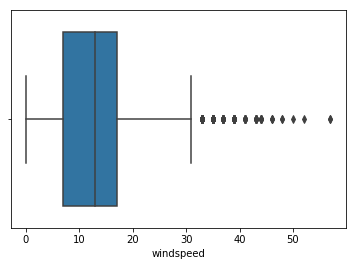

In [21]:
sns.boxplot(df.windspeed)

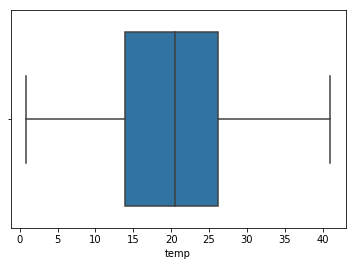

In [22]:
sns.boxplot(df.temp)

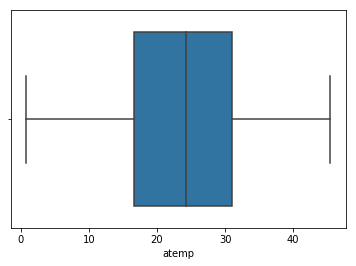

In [23]:
sns.boxplot(df.atemp)

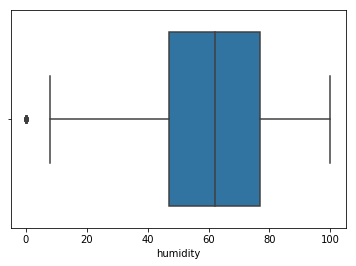

In [24]:
sns.boxplot(df.humidity)

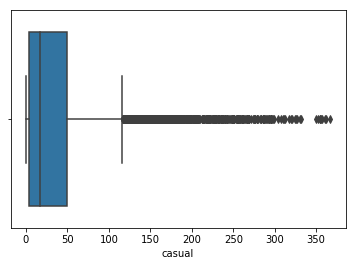

In [25]:
sns.boxplot(df.casual)

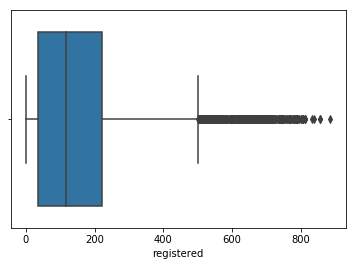

In [26]:
sns.boxplot(df.registered)

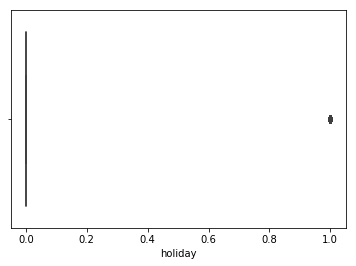

In [27]:
sns.boxplot(df.holiday)

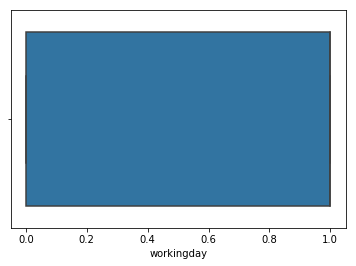

In [28]:
sns.boxplot(df.workingday)

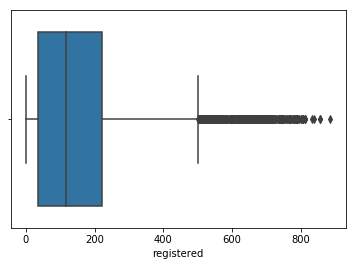

In [29]:
sns.boxplot(df.registered)

## 4.3 Label Missing categorical data

In [84]:
# Display number of missing values by categorical feature
df.select_dtypes(include=['object']).isnull().sum()

datetime    0
dtype: int64

No missing features

## 4.4 Label Missing numerical features

In [30]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

No numerical features with missing values

# 5. Feature Engineering
* Feature engineering is the practice of creating new features from existing ones
* The engineered features are often more specific or isolate key information.
* Often, feature engineering is one of the most valuable tasks a data scientist can do to improve model effectiveness.


In [88]:
df.datetime = df.datetime.apply(pd.to_datetime)
df['month'] = df.datetime.apply(lambda x: x.month)
df['hour'] = df.datetime.apply(lambda x: x.hour)
df['day'] = df.datetime.apply(lambda x: x.day)
#df['year'] = df.datetime.apply(lambda x: x.year)
df.drop(['datetime'], 1, inplace = True)
df.head()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour,day
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,1
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2,1
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,3,1
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,4,1


We have split the categorical feature datetime to the numerical sub features day, month and hour to observe the hourly,daily and monthly trends of the demand

In [33]:
df = df.rename(columns={'count': 'counts'})  # removing ambiguity due to the similarity with the aggregate function count

We will save our new DataFrame that we augmented through feature engineering. We'll call it the analytical base table because we'll be building our models on it.


In [89]:
df.to_csv('Files/analytical_base_table.csv', index=None)

# 6.Machine Learning Models

## 6.1 Data preparation


In [90]:
df = pd.read_csv("Files/analytical_base_table.csv")

In [91]:
print(df.shape)

(10886, 14)


### 6.1.1 Train and Test Splits
Separating dataframe into separate objects for the target variable (y) and the input features (X) and perform the train and test split

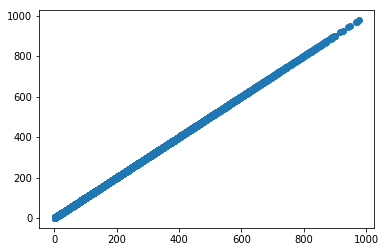

In [92]:
plt.scatter(x = df['casual'] + df['registered'], y = df['count'])
plt.show()

We will have to drop casual,registered (which sums up to count) and count too from X

In [34]:
X = df.drop(['casual','registered','counts'], axis=1)
y = df.counts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


Let's confirm we have the right number of observations in each subset.

In [35]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8708, 11) (2178, 11) (8708,) (2178,)


## 6.2 Data standardization
* In Data Standardization we perform zero mean centring and unit scaling; i.e. we make the mean of all the features as zero and the standard deviation as 1.
* Thus we use **mean** and **standard deviation** of each feature.
* It is very important to save the **mean** and **standard deviation** for each of the feature from the **training set**, because we use the same mean and standard deviation in the test set.

In [36]:
train_mean = X_train.mean()
train_std = X_train.std()

In [37]:
## Standardize the train data set
X_train = (X_train - train_mean) / train_std

In [38]:
## Check for mean and std dev.
X_train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,month,hour,day
count,8.708000e+03,8.708000e+03,8.708000e+03,8.708000e+03,8.708000e+03,8.708000e+03,8.708000e+03,8.708000e+03,8.708000e+03,8.708000e+03,8.708000e+03
mean,2.212286e-16,-5.041838e-16,-1.734692e-16,1.364447e-16,4.817537e-15,-8.722594e-15,-6.810762e-17,-2.348592e-14,2.422398e-17,1.503161e-17,-4.713476e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.342079e+00,-1.701359e-01,-1.455564e+00,-6.526828e-01,-2.492547e+00,-2.699632e+00,-3.205605e+00,-1.559936e+00,-1.597419e+00,-1.671763e+00,-1.641207e+00
25%,-4.468798e-01,-1.701359e-01,-1.455564e+00,-6.526828e-01,-8.051168e-01,-8.202761e-01,-7.632768e-01,-7.070845e-01,-7.266086e-01,-8.067256e-01,-9.123396e-01
50%,-4.468798e-01,-1.701359e-01,6.869398e-01,-6.526828e-01,3.859842e-02,7.479608e-02,1.618965e-02,2.334796e-02,-1.460684e-01,5.831153e-02,-1.255513e-03
75%,1.343518e+00,-1.701359e-01,6.869398e-01,9.447208e-01,7.768493e-01,8.806564e-01,7.956562e-01,5.105750e-01,1.015012e+00,9.233487e-01,9.098286e-01
max,1.343518e+00,5.876980e+00,6.869398e-01,2.542124e+00,2.675209e+00,2.581589e+00,1.990838e+00,5.382845e+00,1.595552e+00,1.644213e+00,1.638696e+00


In [39]:
## Note: We use train_mean and train_std_dev to standardize test data set
X_test = (X_test - train_mean) / train_std

In [40]:
## Check for mean and std dev. - not exactly 0 and 1
X_test.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,month,hour,day
count,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000
mean,0.033190,0.013110,0.016055,0.078544,0.019907,0.028398,0.051429,-0.004219,0.026521,-0.038863,-0.013052
std,0.995771,1.036834,0.993852,1.058897,1.010608,1.006740,0.999457,0.972523,0.998941,0.984913,0.989771
min,-1.342079,-0.170136,-1.455564,-0.652683,-2.492547,-2.610420,-3.205605,-1.559936,-1.597419,-1.671763,-1.641207
25%,-0.446880,-0.170136,-1.455564,-0.652683,-0.805117,-0.820276,-0.763277,-0.707084,-0.726609,-0.806726,-0.912340
50%,0.448319,-0.170136,0.686940,-0.652683,0.038598,0.074796,0.016190,0.023348,0.144202,-0.085861,-0.001256
75%,1.343518,-0.170136,0.686940,0.944721,0.882314,0.880656,0.899585,0.510575,1.015012,0.779176,0.909829
max,1.343518,5.876980,0.686940,4.139528,2.358815,2.491786,1.990838,4.286788,1.595552,1.644213,1.638696


# 6.3 Modelling

## Model 1 - Baseline Model
* In this model, for every test data point, we will simply predict the average of the train labels as the output.
* We will use this simple model to perform hypothesis testing for other complex models.

In [67]:
## Predict Train results
y_train_pred = np.ones(y_train.shape[0])*y_train.mean()

In [68]:
## Predict Test results
y_pred = np.ones(y_test.shape[0])*y_train.mean()

In [69]:
print("Train Results for Baseline Model:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Baseline Model:
*******************************
Root mean squared error:  180.82293692478208
R-squared:  0.0
Mean Absolute Error:  143.257851586


In [70]:
print("Test Results for Baseline Model:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Baseline Model:
*******************************
Root mean squared error:  182.38947289553724
R-squared:  -0.000356466522615
Mean Absolute Error:  141.218460337


## Model-2 Ridge Regression
Linear least squares with l2 regularization.


In [46]:
tuned_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
model = GridSearchCV(Ridge(), tuned_params, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)
model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [47]:
model.best_estimator_

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [48]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [49]:
## Predict Test results
y_pred = model.predict(X_test)

In [50]:
print("Train Results for Ridge Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Ridge Regression:
*******************************
Root mean squared error:  147.534404372031
R-squared:  0.341256899072
Mean Absolute Error:  108.603120997


In [51]:
print("Test Results for Ridge Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Ridge Regression:
*******************************
Root mean squared error:  147.01203054894324
R-squared:  0.322113880897
Mean Absolute Error:  109.131358139


### Feature Importance

In [52]:
## Building the model again with the best hyperparameters
model = Ridge(alpha=100)
model.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [53]:
indices = np.argsort(-abs(model.coef_))
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
hour
humidity
atemp
month
temp
windspeed
weather
season
day
workingday
holiday


## Model-3 Support Vector Regression
With an RBF Kernel

Support Vector Machine - Regression (SVR) Support Vector Machine can also be used as a regression method, maintaining all the main features that characterize the algorithm (maximal margin). 

In [48]:
tuned_params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
model = GridSearchCV(SVR(), tuned_params, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [49]:
model.best_estimator_

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [50]:
## Building the model again with the best hyperparameters
model = SVR(C=100, gamma=0.0001)
model.fit(X_train, y_train)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [51]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [52]:
## Predict Test results
y_pred = model.predict(X_test)

In [53]:
print("Train Results for Support Vector Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Support Vector Regression:
*******************************
Root mean squared error:  158.2559619495935
R-squared:  0.234027597336
Mean Absolute Error:  107.864070355


In [54]:
print("Test Results for Support Vector Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Support Vector Regression:
*******************************
Root mean squared error:  159.27346789047627
R-squared:  0.237144784664
Mean Absolute Error:  106.448479296


## Model-4 Random Forest Regression

In [64]:
## Reference for random search on random forest
## https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
model = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_absolute_error',
          verbose=0)

In [65]:
model.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [66]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [67]:
## Predict Test results
y_pred = model.predict(X_test)

In [68]:
print("Train Results for Random Forest Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Random Forest Regression:
*******************************
Root mean squared error:  24.214307385038197
R-squared:  0.982255099566
Mean Absolute Error:  15.9693172944


In [69]:
print("Test Results for Random Forest Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Random Forest Regression:
*******************************
Root mean squared error:  66.98847639058272
R-squared:  0.859249097234
Mean Absolute Error:  44.4527330119


### Feature Importance

In [70]:
## Building the model again with the best hyperparameters
model = RandomForestRegressor(n_estimators=400, min_samples_split=2, min_samples_leaf=1)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [71]:
indices = np.argsort(-model.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
hour
temp
workingday
humidity
atemp
month
day
windspeed
weather
season
holiday


##  Model-5 XGBoost Regression

In [55]:
## Reference for random search on xgboost
## https://gist.github.com/wrwr/3f6b66bf4ee01bf48be965f60d14454d
tuned_params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}
model = RandomizedSearchCV(XGBRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_absolute_error',
          verbose=0)

In [56]:
model.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=400,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [57]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [58]:
## Predict Test results
y_pred = model.predict(X_test)

In [59]:
print("Train Results for XGBoost Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for XGBoost Regression:
*******************************
Root mean squared error:  44.8392168124759
R-squared:  0.93915211305
Mean Absolute Error:  30.4837245893


In [60]:
print("Test Results for XGBoost Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for XGBoost Regression:
*******************************
Root mean squared error:  61.48026709461079
R-squared:  0.881444288864
Mean Absolute Error:  42.2260436698


### Feature Importance

In [61]:
## Building the model again with the best hyperparameters
model = XGBRegressor(max_depth=5,learning_rate=0.1,n_estimators=400, reg_lambda=0.1)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=400,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [62]:
## Function to include figsize parameter
## Reference: https://stackoverflow.com/questions/40081888/xgboost-plot-importance-figure-size
def my_plot_importance(booster, figsize, **kwargs): 
    from matplotlib import pyplot as plt
    from xgboost import plot_importance
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax, **kwargs)

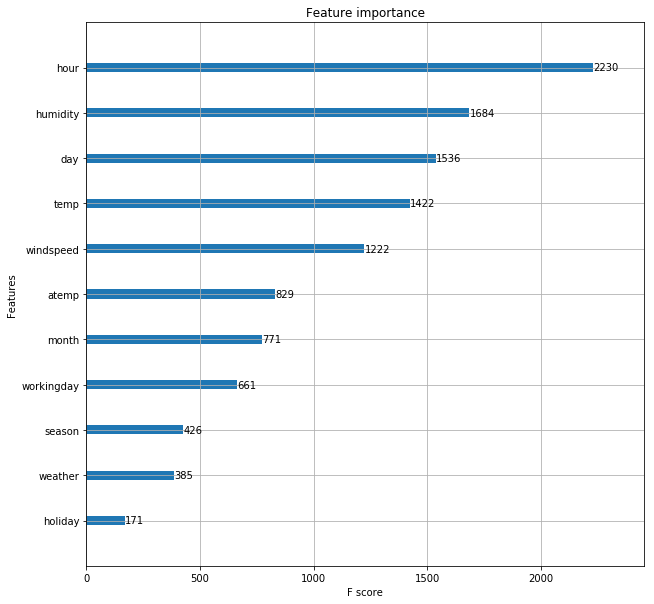

In [63]:
my_plot_importance(model, (10,10))

## Model-6 KNN Regression

In [55]:
from sklearn.neighbors import KNeighborsRegressor 
tuned_params = {'n_neighbors': range(2,100)}
model = GridSearchCV(KNeighborsRegressor(), tuned_params, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': range(2, 100)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [56]:
model.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [57]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [58]:
## Predict Test results
y_pred = model.predict(X_test)

In [59]:
print("Train Results for KNN Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for KNN Regression:
*******************************
Root mean squared error:  78.22670993201183
R-squared:  0.812844285344
Mean Absolute Error:  49.3965319247


In [60]:
print("Test Results for KNN Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for KNN Regression:
*******************************
Root mean squared error:  114.11039513260236
R-squared:  0.608433376797
Mean Absolute Error:  74.847107438


## Model-7 Lasso Regression

In [74]:
tuned_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
model = GridSearchCV(Lasso(), tuned_params, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)
model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [75]:
model.best_estimator_

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [76]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [77]:
## Predict Test results
y_pred = model.predict(X_test)

In [78]:
print("Train Results for Lasso Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Lasso Regression:
*******************************
Root mean squared error:  147.5435482673118
R-squared:  0.34117524131
Mean Absolute Error:  108.504747317


In [79]:
print("Test Results for Lasso Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Lasso Regression:
*******************************
Root mean squared error:  147.12224079608237
R-squared:  0.321097120564
Mean Absolute Error:  109.122546716


## Feature Importance

In [80]:
## Building the model again with the best hyperparameters
model = Lasso(alpha=1)
model.fit(X_train, y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [81]:
indices = np.argsort(-abs(model.coef_))
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
hour
atemp
humidity
month
temp
windspeed
weather
season
holiday
workingday
day


##  Model-8 Decision Tree Regression

In [61]:
from sklearn.tree import DecisionTreeRegressor
tuned_params = {'max_depth': range(2,1000)}
model = GridSearchCV(DecisionTreeRegressor(), tuned_params, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)
model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(2, 1000)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [62]:
model.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=11, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [63]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [64]:
## Predict Test results
y_pred = model.predict(X_test)

In [65]:
print("Train Results for Decision Tree Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Decision Tree Regression:
*******************************
Root mean squared error:  59.74690944316313
R-squared:  0.890824836009
Mean Absolute Error:  36.7118121401


In [66]:
print("Test Results for Decision Tree Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Decision Tree Regression:
*******************************
Root mean squared error:  82.16763012017255
R-squared:  0.796971610401
Mean Absolute Error:  53.448517355


# 7. Save the winning model to disk

###  *Win condition: Minimum Root Mean Squared Error of 61.480 has been achieved using **XGBoost Regression***

In [43]:
win_model = XGBRegressor(max_depth=5,learning_rate=0.1,n_estimators=400, reg_lambda=0.1)
win_model.fit(X_train, y_train)
joblib.dump(win_model, 'xgb_bike_sharing.pkl') 

['xgb_bike_sharing.pkl']

# 8. Final Results and Tabulation

### OBSERVATIONS:

Through exploratory analysis on the data about bike sharing rental counts, we discovered that hour of the day feature which we had introduced is the two most important factor that drives the demand of bike sharing rental.

* Hourly trend: There must be high demand during office timings. Early morning and late evening can have different trend (cyclist) and low demand during 10:00 pm to 4:00 am.

* Daily Trend: Registered users demand more bike on weekdays as compared to weekend or holiday.

* Rain: The demand of bikes will be lower on a rainy day as compared to a sunny day. Similarly, higher humidity will cause to lower the demand and vice versa.

* Temperature: Temperature has positive correlation with bike demand. 



### Table showing RMSE,R squared and Mean Absolute Error Values:

![title](Images/resulttable.png)